# Python图算法学习

本notebook将介绍图论的基本概念和算法，并通过实际代码示例进行演示。

## 1. 安装依赖

首先安装本次学习所需的依赖库：

In [1]:
# 安装必要的库
!pip install networkx matplotlib numpy pandas

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imgaug 0.4.0 requires opencv-python, which is not installed.
imgaug 0.4.0 requires scipy, which is not installed.
scikit-image 0.25.1 requires scipy>=1.11.2, which is not installed.
scikit-learn 1.6.1 requires scipy>=1.6.0, which is not installed.


## 2. 库介绍

- **NetworkX**：Python中最流行的图论库，提供了图的创建、操作和分析功能
- **Matplotlib**：用于数据可视化
- **NumPy**：用于科学计算
- **Pandas**：用于数据处理和分析

In [2]:
# 导入必要的库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# 设置中文字体，使用SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

print("库导入成功！")

库导入成功！


## 3. 图的基本概念

### 图的定义
图是由顶点（节点）和边组成的数据结构。图可以表示物体之间的连接关系。

### 图的类型
1. **无向图**：边没有方向
2. **有向图**：边有特定方向
3. **加权图**：边具有特定权重
4. **无权图**：边没有权重
5. **连通图**：每对顶点间都有路径
6. **非连通图**：存在无法互相到达的顶点

### 图的表示方法
1. **邻接矩阵**：二维数组表示顶点间的连接
2. **邻接表**：数组或链表存储每个顶点的邻接点

## 4. 图的创建与可视化

让我们首先创建并可视化一些基本图结构：

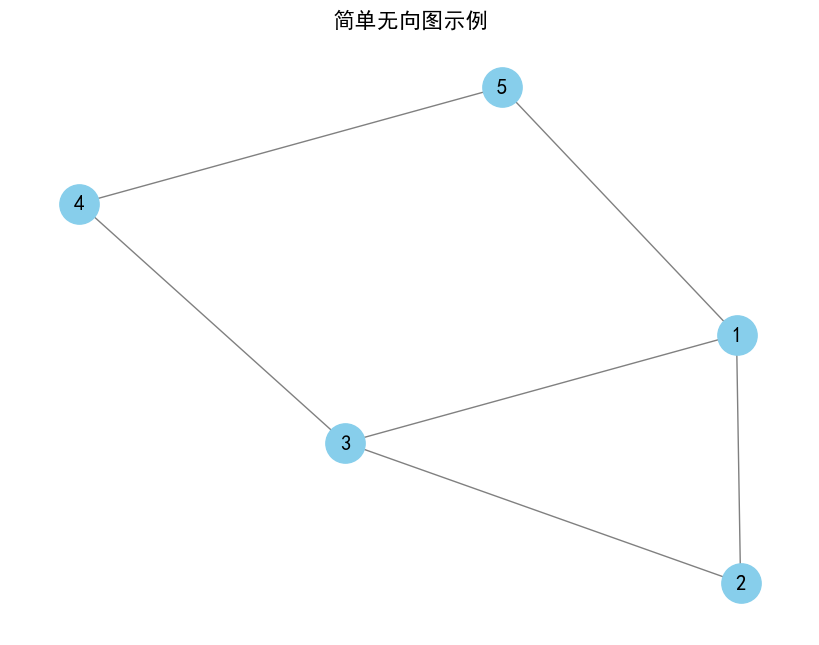

In [3]:
# 创建一个简单的无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from([1, 2, 3, 4, 5])

# 添加边
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 1)])

# 绘制图
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # 定义节点位置布局
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray', font_size=15, font_weight='bold')
plt.title("简单无向图示例", fontsize=16)
plt.show()

### 创建有向图

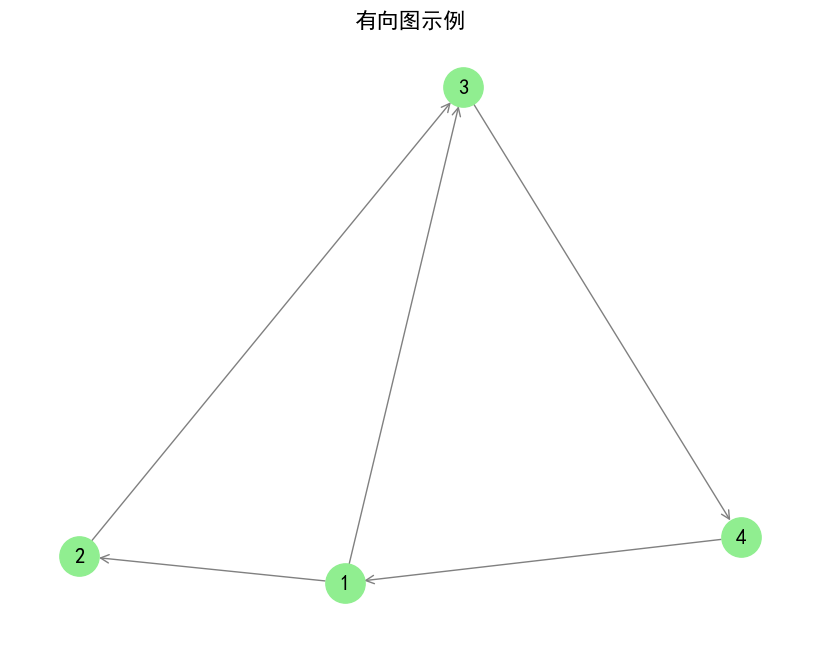

In [4]:
# 创建一个有向图
DG = nx.DiGraph()

# 添加节点和边
DG.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])

# 绘制有向图
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', node_size=800,
        arrowsize=15, arrowstyle='->', edge_color='gray', font_size=15)
plt.title("有向图示例", fontsize=16)
plt.show()

### 创建加权图

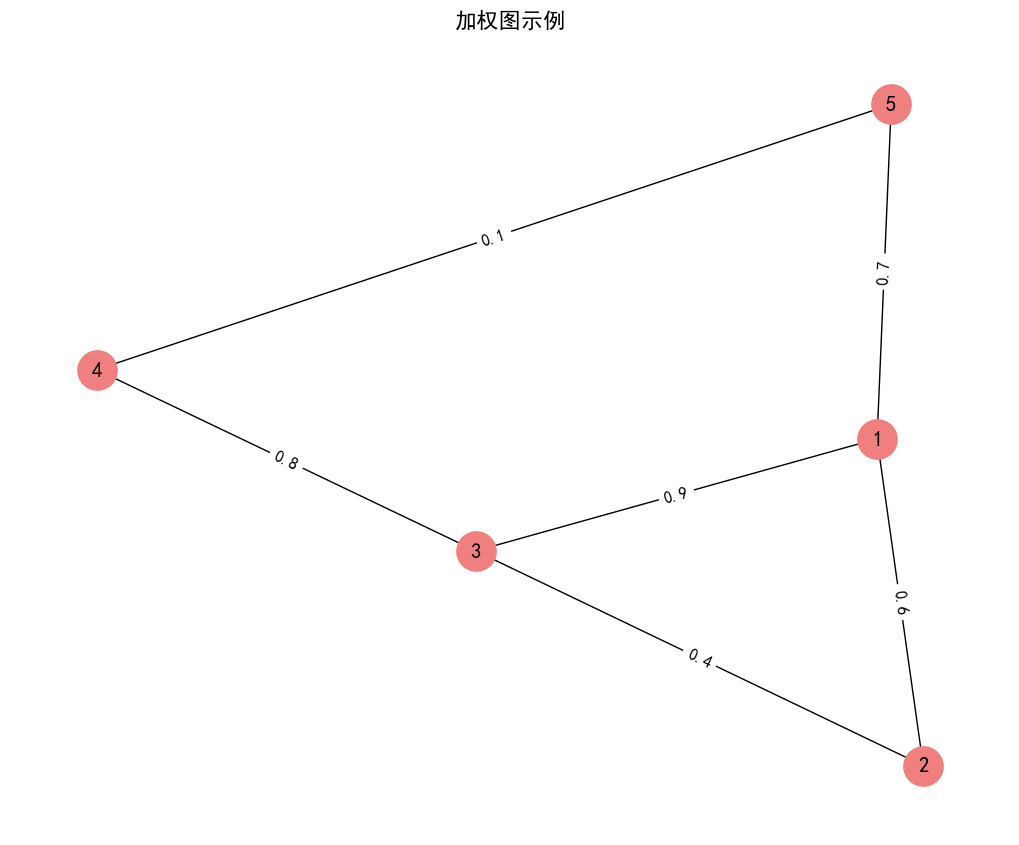

In [5]:
# 创建一个加权图
G_weighted = nx.Graph()

# 添加带权重的边
weighted_edges = [(1, 2, 0.6), (1, 3, 0.9), (2, 3, 0.4), 
                  (3, 4, 0.8), (4, 5, 0.1), (5, 1, 0.7)]
G_weighted.add_weighted_edges_from(weighted_edges)

# 获取边权重
weights = [G_weighted[u][v]['weight'] for u, v in G_weighted.edges()]

# 绘制加权图
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_weighted, seed=42)  # 固定布局
nx.draw(G_weighted, pos, with_labels=True, node_color='lightcoral', 
        node_size=800, font_size=15, font_weight='bold')

# 显示边权重
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels, font_size=12)

plt.title("加权图示例", fontsize=16)
plt.show()

## 5. 图的遍历算法

### 深度优先搜索 (DFS)
深度优先搜索是一种从根节点开始探索，尽可能深入分支的算法。

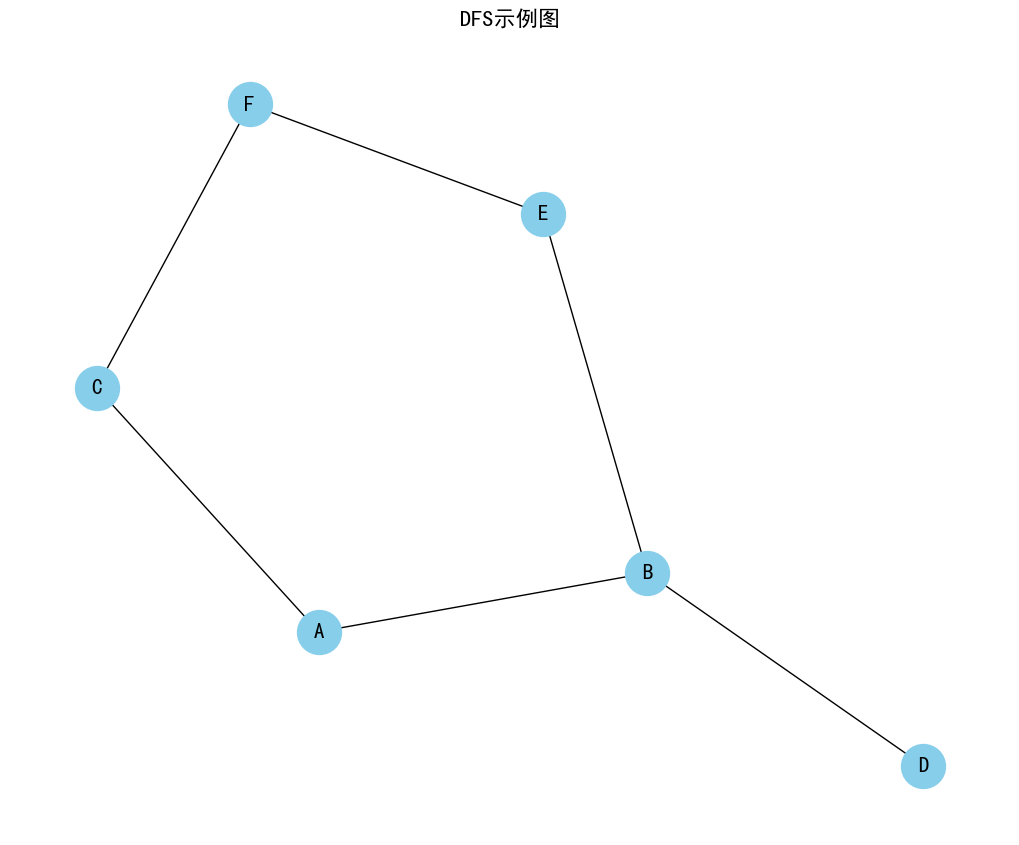

深度优先搜索遍历顺序:
访问节点: A
访问节点: B
访问节点: D
访问节点: E
访问节点: F
访问节点: C


In [6]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    
    print(f"访问节点: {start}")
    
    for next_node in graph[start]:
        if next_node not in visited:
            dfs(graph, next_node, visited)
    return visited

# 创建一个图用于DFS演示
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# 可视化这个图
G_dfs = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G_dfs.add_edge(node, neighbor)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_dfs, seed=42)
nx.draw(G_dfs, pos, with_labels=True, node_color='skyblue', 
        node_size=1000, font_size=15, font_weight='bold')
plt.title("DFS示例图", fontsize=16)
plt.show()

# 执行DFS
print("深度优先搜索遍历顺序:")
dfs_result = dfs(graph, 'A')

### 广度优先搜索 (BFS)
广度优先搜索是一种从根节点开始，先访问邻近节点再访问较远节点的算法。

广度优先搜索遍历顺序:
['A', 'B', 'C', 'D', 'E', 'F']


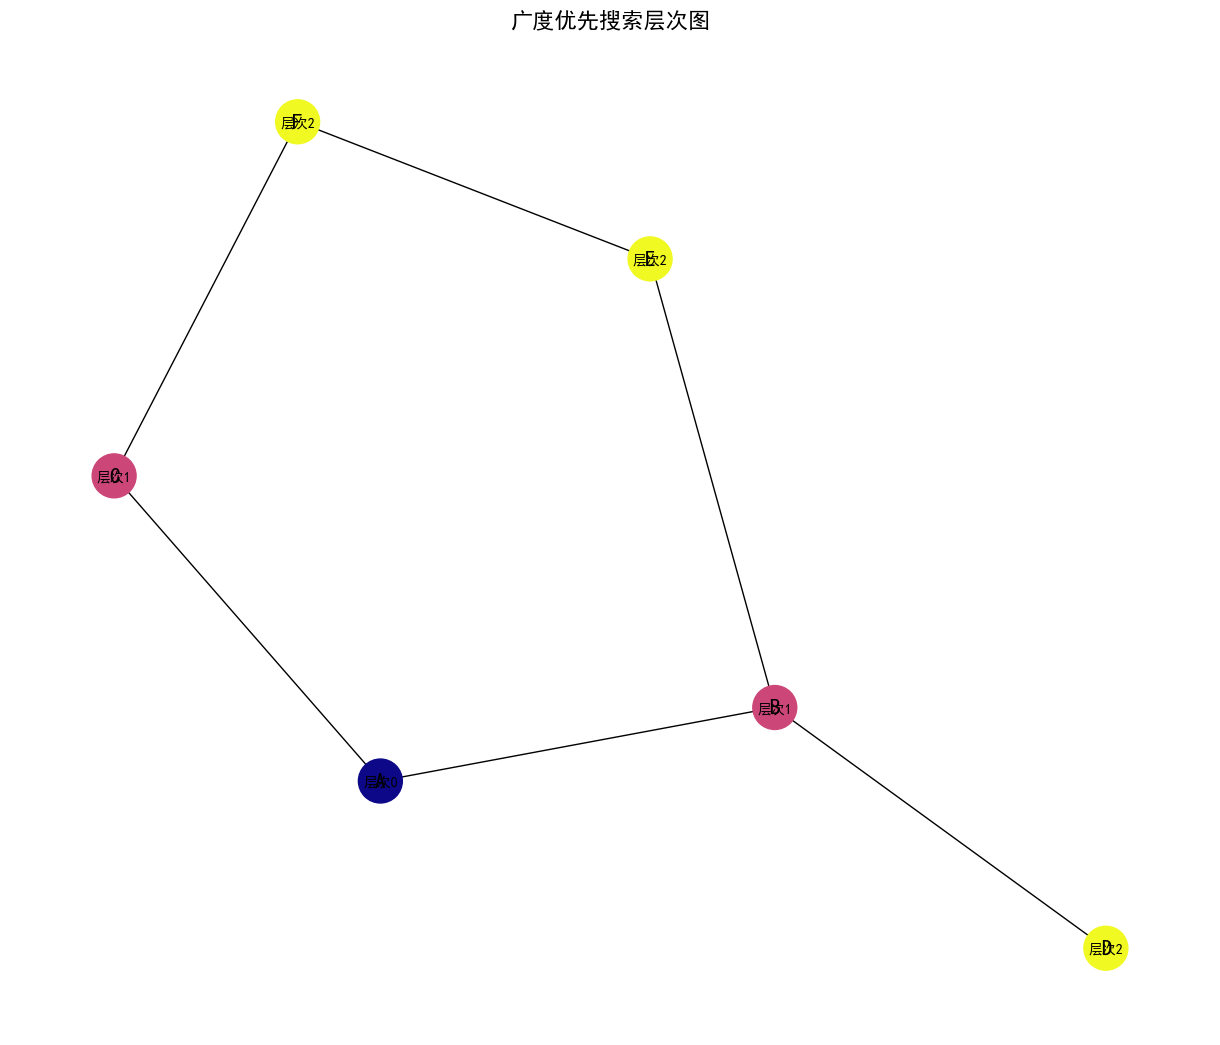

In [7]:
from collections import deque

def bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    result = []
    
    while queue:
        node = queue.popleft()
        result.append(node)
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    return result

# 执行BFS
print("广度优先搜索遍历顺序:")
bfs_result = bfs(graph, 'A')
print(bfs_result)

# 可视化BFS的过程
def visualize_bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    level = {start: 0}
    parent = {start: None}
    bfs_levels = []
    i = 1
    
    while queue:
        node = queue.popleft()
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                level[neighbor] = level[node] + 1
                parent[neighbor] = node
                bfs_levels.append((node, neighbor, level[neighbor]))
    
    # 可视化BFS层次
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)
    
    # 绘制节点，颜色根据层次变化
    node_colors = [plt.cm.plasma(level[node]/max(level.values())) for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, 
            node_size=1000, font_size=15, font_weight='bold')
    
    # 标注层次
    nx.draw_networkx_labels(G, pos, labels={node: f"层次{lev}" for node, lev in level.items()}, font_size=10)
    
    plt.title("广度优先搜索层次图", fontsize=16)
    plt.show()
    
    return level, parent

# 执行并可视化BFS
level, parent = visualize_bfs(graph, 'A')

## 6. 最短路径算法

### Dijkstra算法
Dijkstra算法用于求解单源最短路径问题。

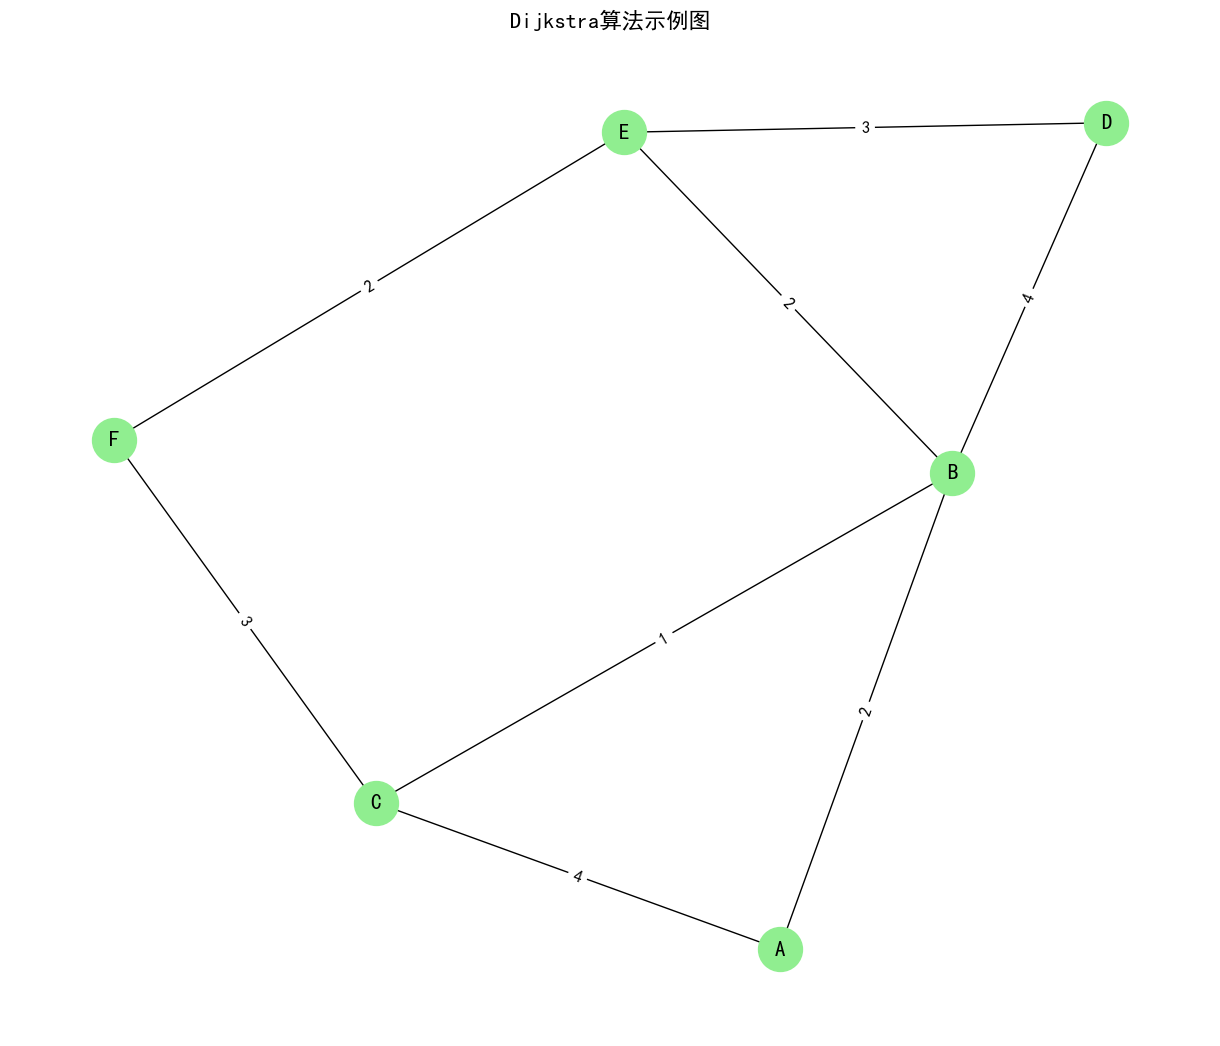

从节点 A 到各节点的最短距离:
到节点 A 的最短距离: 0
到节点 B 的最短距离: 2
到节点 C 的最短距离: 3
到节点 D 的最短距离: 6
到节点 E 的最短距离: 4
到节点 F 的最短距离: 6


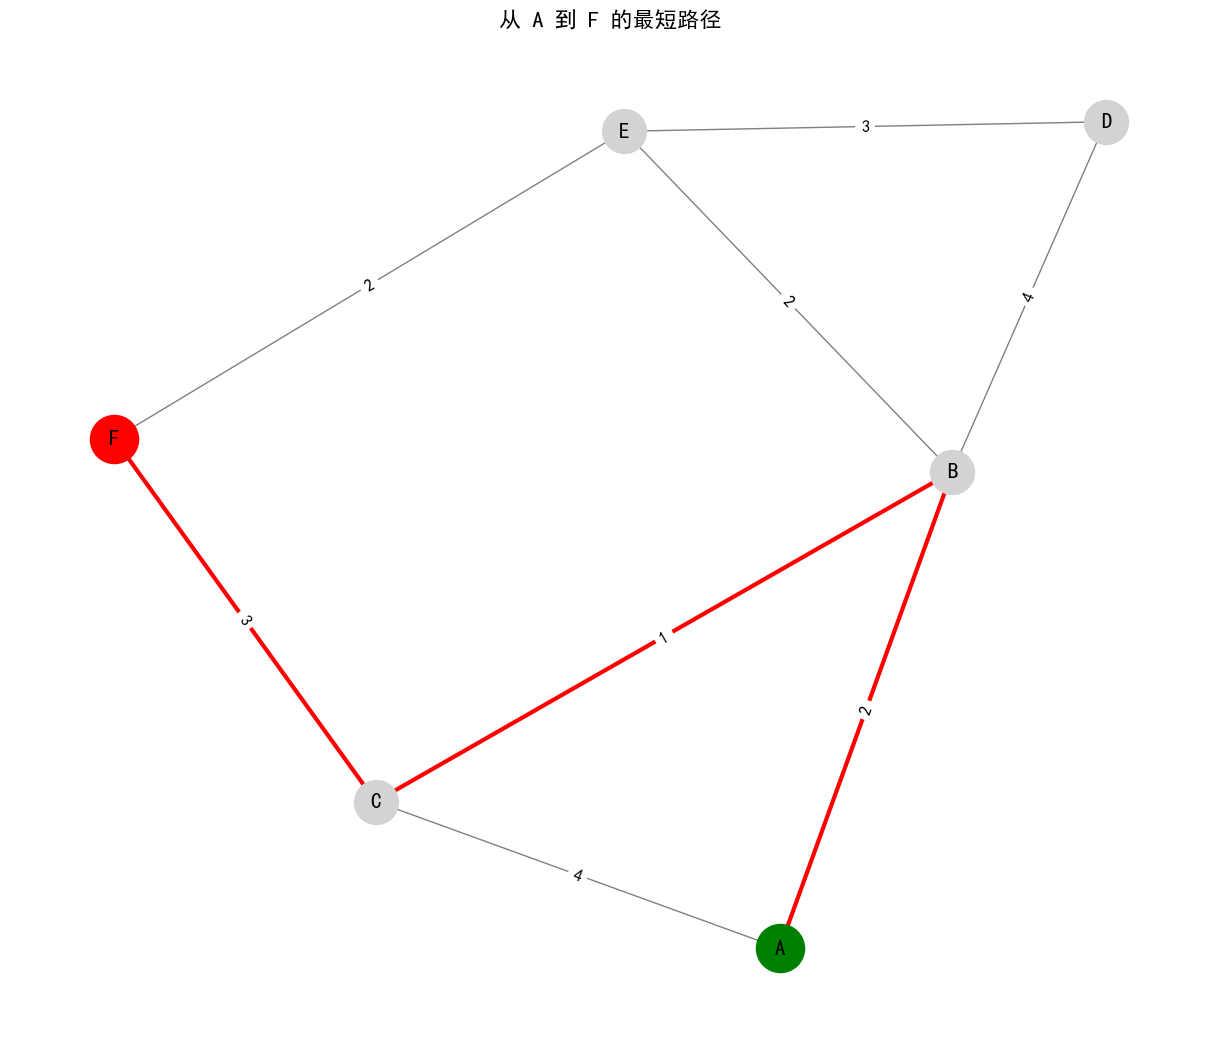

从A到F的最短路径: A -> B -> C -> F


In [8]:
# 创建一个带权重的图用于Dijkstra算法演示
weighted_graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'A': 2, 'C': 1, 'D': 4, 'E': 2},
    'C': {'A': 4, 'B': 1, 'F': 3},
    'D': {'B': 4, 'E': 3},
    'E': {'B': 2, 'D': 3, 'F': 2},
    'F': {'C': 3, 'E': 2}
}

# 实现Dijkstra算法
def dijkstra(graph, start):
    # 初始化距离字典
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited = list(graph.keys())
    previous = {node: None for node in graph}
    
    while unvisited:
        # 找到未访问节点中距离最小的
        current = min(unvisited, key=lambda node: distances[node])
        
        # 如果当前节点距离为无限，则停止算法（图不连通）
        if distances[current] == float('infinity'):
            break
            
        # 移除当前节点
        unvisited.remove(current)
        
        # 检查当前节点的邻居
        for neighbor, weight in graph[current].items():
            distance = distances[current] + weight
            
            # 如果找到更短路径，更新距离
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current
                
    return distances, previous

# 可视化带权图
G_weighted = nx.Graph()
for node, neighbors in weighted_graph.items():
    for neighbor, weight in neighbors.items():
        G_weighted.add_edge(node, neighbor, weight=weight)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_weighted, seed=42)
nx.draw(G_weighted, pos, with_labels=True, node_color='lightgreen', 
        node_size=1000, font_size=15, font_weight='bold')

# 显示边权重
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels, font_size=12)

plt.title("Dijkstra算法示例图", fontsize=16)
plt.show()

# 执行Dijkstra算法
start_node = 'A'
distances, previous = dijkstra(weighted_graph, start_node)
print(f"从节点 {start_node} 到各节点的最短距离:")
for node, distance in distances.items():
    print(f"到节点 {node} 的最短距离: {distance}")

# 可视化最短路径
def visualize_shortest_path(graph, start, end, previous):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()
    
    # 创建路径的边列表
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    
    # 绘制图形
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G_weighted, seed=42)
    
    # 绘制所有边
    nx.draw(G_weighted, pos, with_labels=True, node_color='lightgrey', 
            node_size=1000, font_size=15, font_weight='bold', edge_color='grey')
    
    # 高亮显示最短路径边
    nx.draw_networkx_edges(G_weighted, pos, edgelist=path_edges, edge_color='red', width=3)
    
    # 显示边权重
    edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
    nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels, font_size=12)
    
    # 高亮显示起点和终点
    nx.draw_networkx_nodes(G_weighted, pos, nodelist=[start], node_color='green', node_size=1200)
    nx.draw_networkx_nodes(G_weighted, pos, nodelist=[end], node_color='red', node_size=1200)
    
    plt.title(f"从 {start} 到 {end} 的最短路径", fontsize=16)
    plt.show()
    
    return path

# 可视化从A到F的最短路径
shortest_path = visualize_shortest_path(weighted_graph, 'A', 'F', previous)
print(f"从A到F的最短路径: {' -> '.join(shortest_path)}")

## 7. 最小生成树算法

### Kruskal算法
Kruskal算法是一种贪心算法，用于在带权无向图中寻找最小生成树。

最小生成树的边:
边 B-C 权重: 1
边 A-B 权重: 2
边 B-E 权重: 2
边 E-F 权重: 2
边 D-E 权重: 3
最小生成树总权重: 10


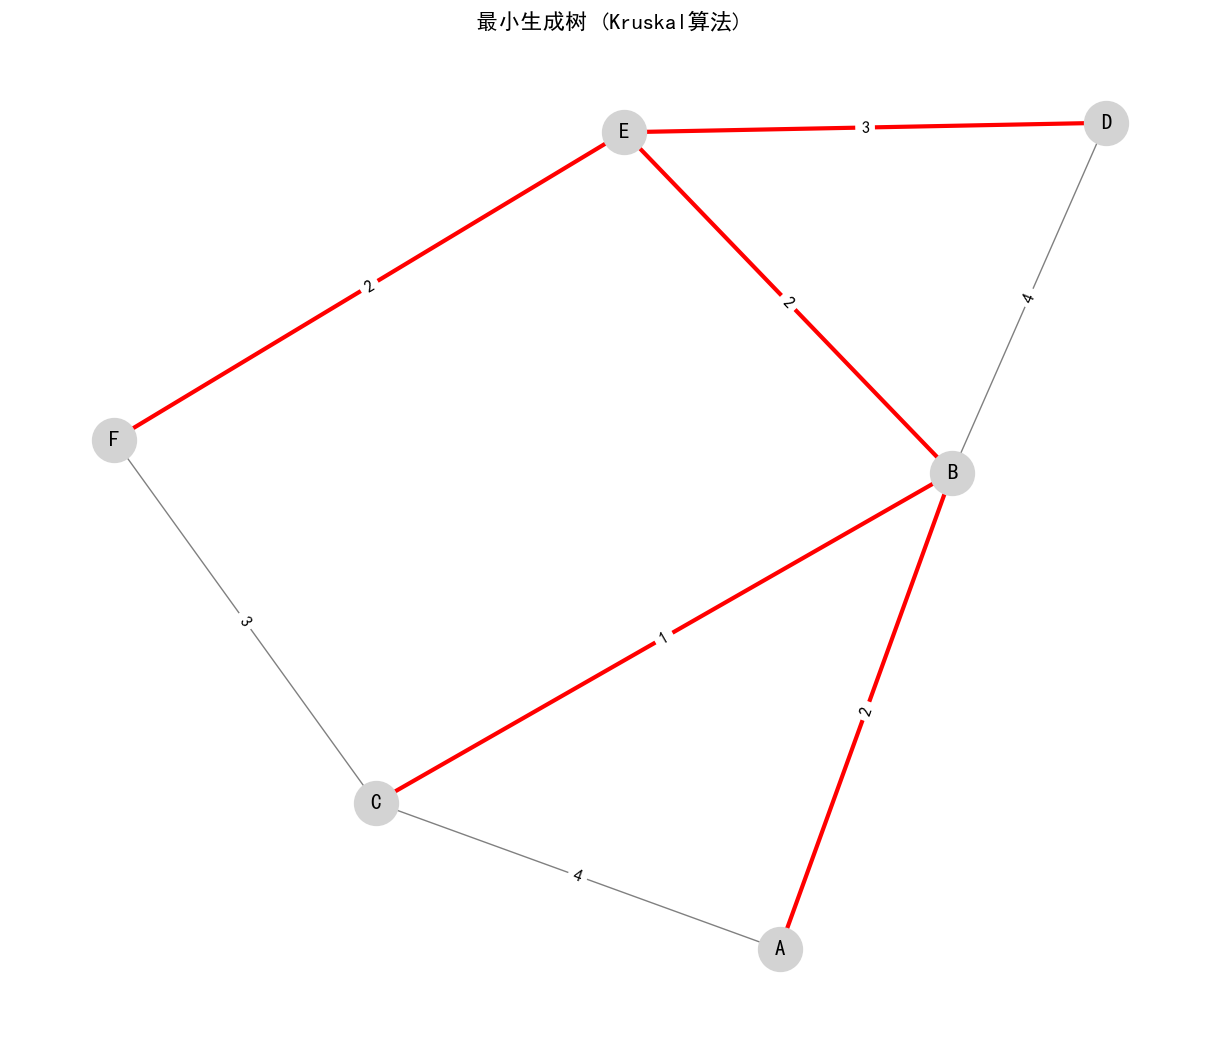

In [9]:
# 创建并查集数据结构用于Kruskal算法
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}
    
    def find(self, item):
        if self.parent[item] != item:
            self.parent[item] = self.find(self.parent[item])
        return self.parent[item]
    
    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x == root_y:
            return
        
        if self.rank[root_x] < self.rank[root_y]:
            self.parent[root_x] = root_y
        else:
            self.parent[root_y] = root_x
            if self.rank[root_x] == self.rank[root_y]:
                self.rank[root_x] += 1

# 实现Kruskal算法
def kruskal_mst(graph):
    # 提取所有边及其权重
    edges = []
    for u in graph:
        for v, weight in graph[u].items():
            if u < v:  # 避免重复边（对于无向图）
                edges.append((u, v, weight))
    
    # 按权重排序边
    edges.sort(key=lambda x: x[2])
    
    vertices = list(graph.keys())
    ds = DisjointSet(vertices)
    mst = []
    
    for u, v, weight in edges:
        if ds.find(u) != ds.find(v):  # 检查是否会形成环
            ds.union(u, v)
            mst.append((u, v, weight))
    
    return mst

# 执行Kruskal算法找最小生成树
mst_edges = kruskal_mst(weighted_graph)
print("最小生成树的边:")
total_weight = 0
for u, v, weight in mst_edges:
    print(f"边 {u}-{v} 权重: {weight}")
    total_weight += weight
print(f"最小生成树总权重: {total_weight}")

# 可视化最小生成树
def visualize_mst(graph, mst_edges):
    G = nx.Graph()
    
    # 添加所有原图的边
    for u in graph:
        for v, weight in graph[u].items():
            G.add_edge(u, v, weight=weight)
    
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)
    
    # 绘制所有边
    nx.draw(G, pos, with_labels=True, node_color='lightgrey', 
            node_size=1000, font_size=15, font_weight='bold', edge_color='grey', width=1)
    
    # 高亮显示MST边
    mst_edge_list = [(u, v) for u, v, _ in mst_edges]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, edge_color='red', width=3)
    
    # 显示边权重
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    
    plt.title("最小生成树 (Kruskal算法)", fontsize=16)
    plt.show()

# 可视化最小生成树
visualize_mst(weighted_graph, mst_edges)

## 8. 图的应用案例

下面我们将看一个现实应用案例：城市交通网络。

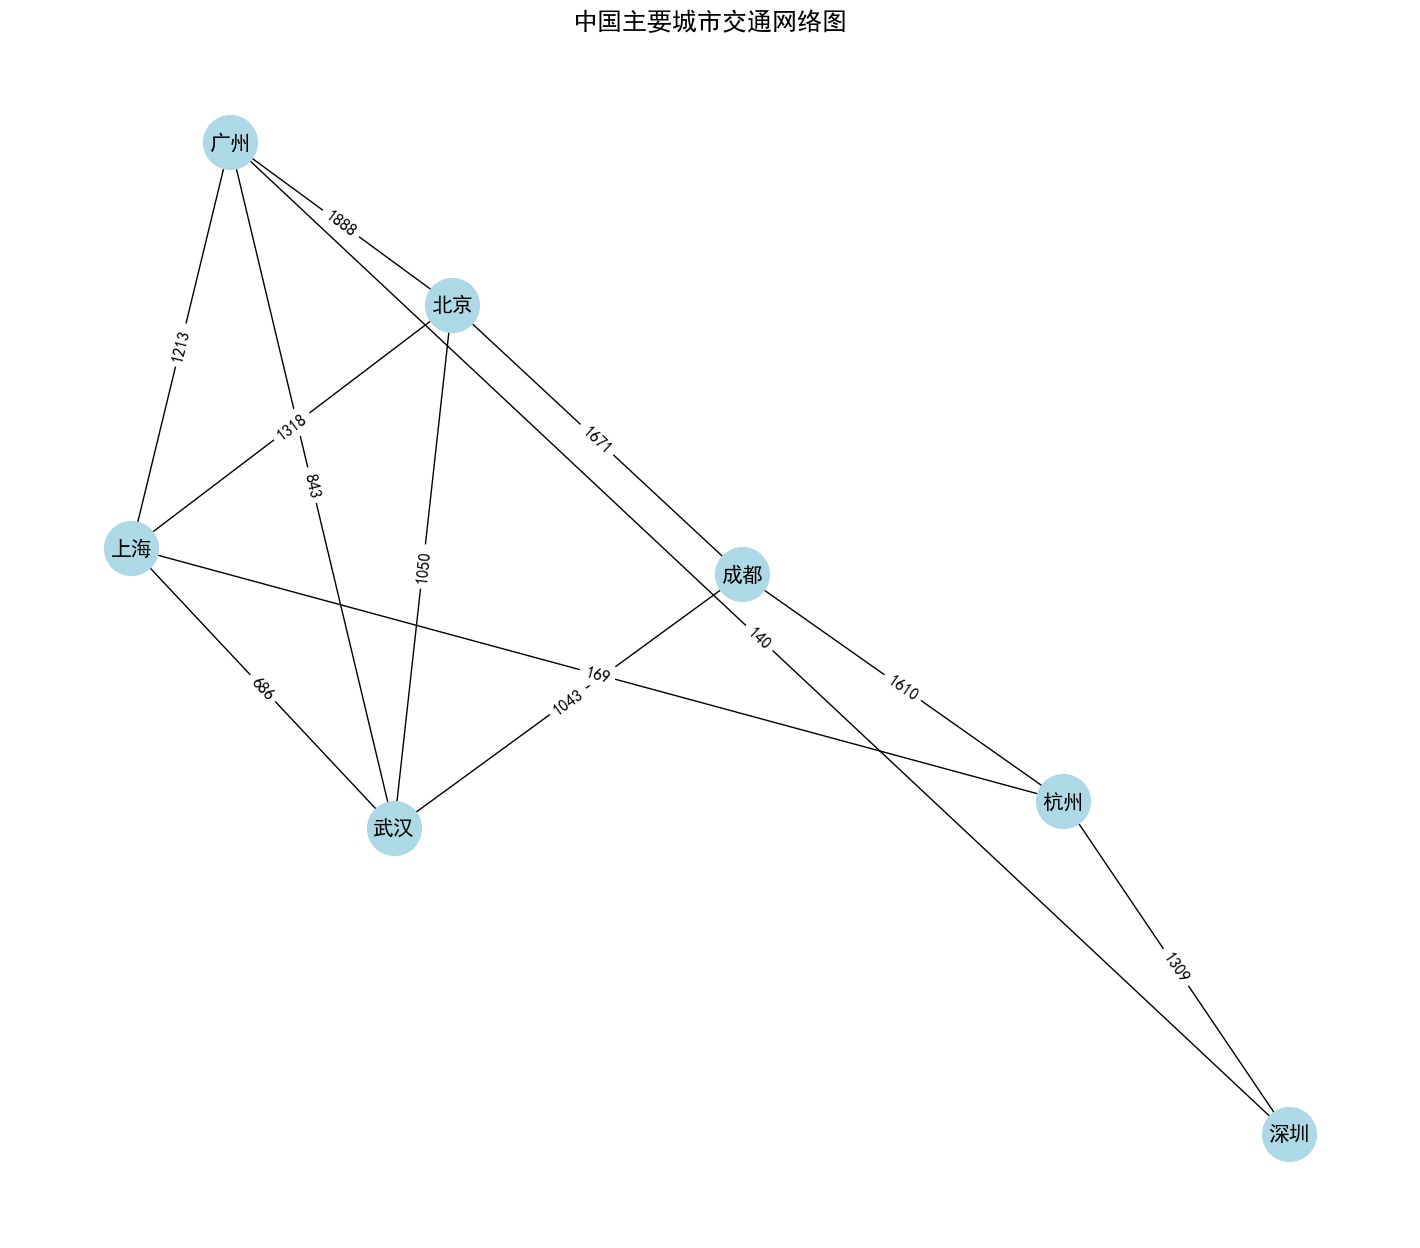

从 北京 到 深圳 的最短路径:
北京 -> 广州 -> 深圳
总距离: 2028 公里


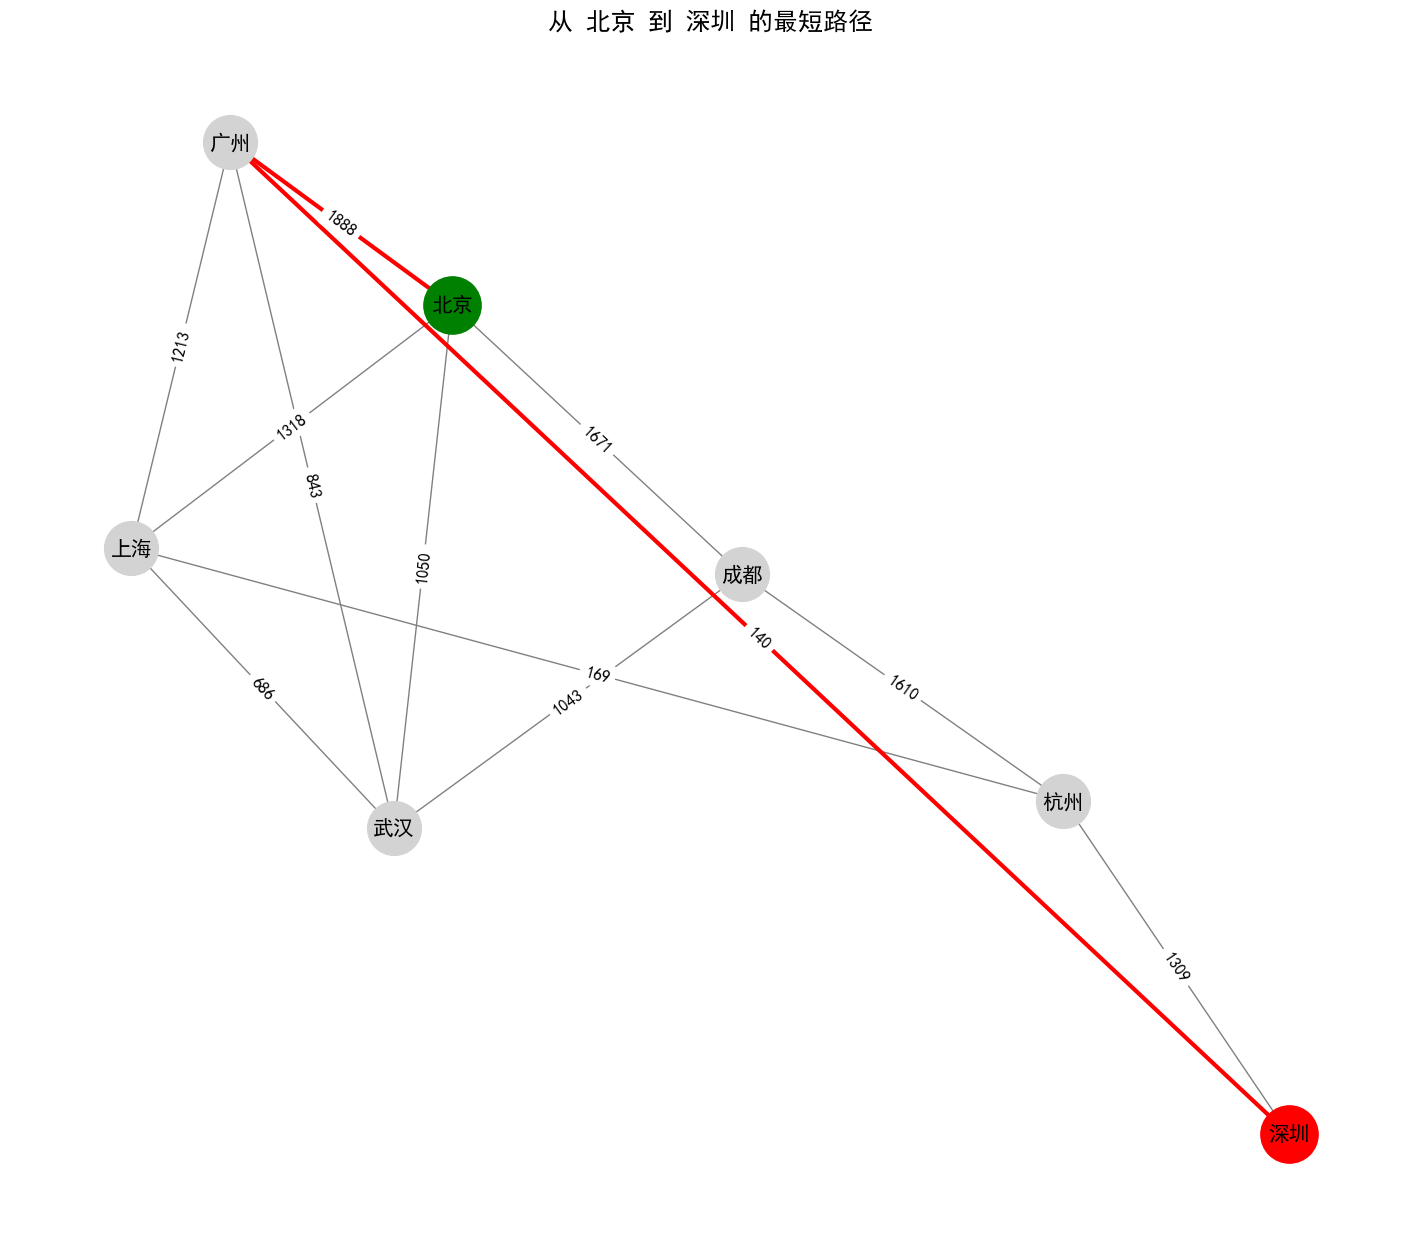

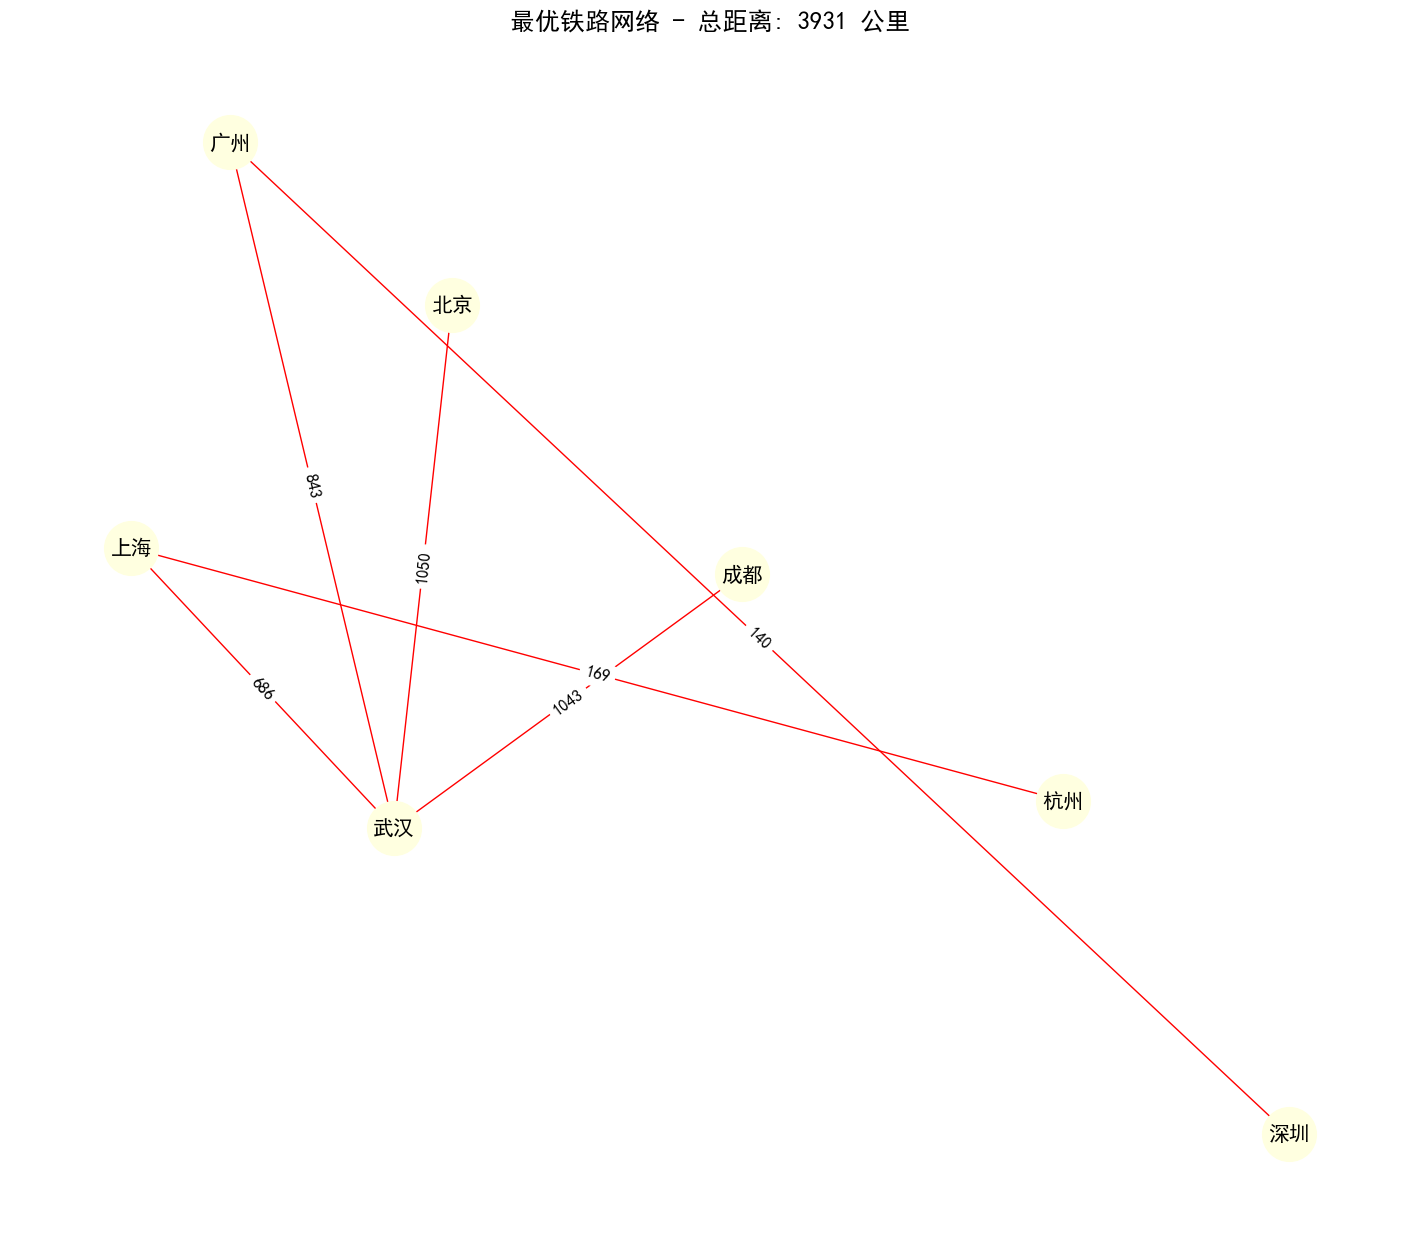

In [10]:
# 创建一个城市交通网络
cities = ['北京', '上海', '广州', '深圳', '杭州', '成都', '武汉']

# 城市间距离（公里）
distances = {
    '北京': {'上海': 1318, '广州': 1888, '成都': 1671, '武汉': 1050},
    '上海': {'北京': 1318, '广州': 1213, '杭州': 169, '武汉': 686},
    '广州': {'北京': 1888, '上海': 1213, '深圳': 140, '武汉': 843},
    '深圳': {'广州': 140, '杭州': 1309},
    '杭州': {'上海': 169, '深圳': 1309, '成都': 1610},
    '成都': {'北京': 1671, '杭州': 1610, '武汉': 1043},
    '武汉': {'北京': 1050, '上海': 686, '广州': 843, '成都': 1043}
}

# 创建交通网络图
G_cities = nx.Graph()
for city, neighbors in distances.items():
    for neighbor, dist in neighbors.items():
        G_cities.add_edge(city, neighbor, weight=dist)

# 可视化交通网络
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G_cities, seed=42)
nx.draw(G_cities, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=15, font_weight='bold')

# 显示距离
edge_labels = nx.get_edge_attributes(G_cities, 'weight')
nx.draw_networkx_edge_labels(G_cities, pos, edge_labels=edge_labels, font_size=12)

plt.title("中国主要城市交通网络图", fontsize=18)
plt.show()

# 计算两个城市之间的最短路径
start_city = '北京'
end_city = '深圳'

try:
    shortest_path = nx.shortest_path(G_cities, source=start_city, target=end_city, weight='weight')
    shortest_path_length = nx.shortest_path_length(G_cities, source=start_city, target=end_city, weight='weight')
    
    print(f"从 {start_city} 到 {end_city} 的最短路径:")
    print(" -> ".join(shortest_path))
    print(f"总距离: {shortest_path_length} 公里")
    
    # 可视化最短路径
    plt.figure(figsize=(14, 12))
    
    # 绘制所有边
    nx.draw(G_cities, pos, with_labels=True, node_color='lightgrey', 
            node_size=1500, font_size=15, font_weight='bold', edge_color='grey')
    
    # 高亮显示最短路径
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G_cities, pos, edgelist=path_edges, edge_color='red', width=3)
    
    # 高亮显示起点和终点
    nx.draw_networkx_nodes(G_cities, pos, nodelist=[start_city], node_color='green', node_size=1700)
    nx.draw_networkx_nodes(G_cities, pos, nodelist=[end_city], node_color='red', node_size=1700)
    
    # 显示距离
    edge_labels = nx.get_edge_attributes(G_cities, 'weight')
    nx.draw_networkx_edge_labels(G_cities, pos, edge_labels=edge_labels, font_size=12)
    
    plt.title(f"从 {start_city} 到 {end_city} 的最短路径", fontsize=18)
    plt.show()
    
except nx.NetworkXNoPath:
    print(f"从 {start_city} 到 {end_city} 没有可达路径。")

# 计算城市网络的最小生成树（最优铁路网络）
mst = nx.minimum_spanning_tree(G_cities, weight='weight')

# 可视化最小生成树
plt.figure(figsize=(14, 12))
nx.draw(mst, pos, with_labels=True, node_color='lightyellow', 
        node_size=1500, font_size=15, font_weight='bold', edge_color='red')

# 显示MST边的权重
mst_edge_labels = {(u, v): G_cities[u][v]['weight'] for u, v in mst.edges()}
nx.draw_networkx_edge_labels(mst, pos, edge_labels=mst_edge_labels, font_size=12)

# 计算MST的总权重（总距离）
total_mst_weight = sum(mst[u][v]['weight'] for u, v in mst.edges())
plt.title(f"最优铁路网络 - 总距离: {total_mst_weight} 公里", fontsize=18)
plt.show()

## 9. 总结

在本教程中，我们学习了：

1. **图的基本概念**：顶点、边、有向图、无向图等
2. **图的表示方法**：邻接矩阵、邻接表
3. **图的遍历算法**：深度优先搜索(DFS)和广度优先搜索(BFS)
4. **最短路径算法**：Dijkstra算法
5. **最小生成树算法**：Kruskal算法
6. **实际应用案例**：城市交通网络分析

图算法是计算机科学中非常重要的一部分，它们在许多领域有广泛的应用，如：
- 社交网络分析
- 路由算法
- 导航系统
- 网络流分析
- 任务调度

通过理解和掌握这些基本算法，你可以解决许多复杂的实际问题。